In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
!pip install tensorflowjs

     |████████████████████████████████| 71kB 1.8MB/s 
     |████████████████████████████████| 137.3MB 65kB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 256kB 40.6MB/s 
     |████████████████████████████████| 921kB 44.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=3c1ec60140806f75a76f5aeb05b0d38a1b10c27aa063acee60a514ccc7911ad4
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [4]:
from google.colab import files
uploaded=files.upload()

Saving digital_ad_test.csv to digital_ad_test.csv


In [5]:
ad_train = pd.read_csv('digital_ad_train.csv')
ad_test = pd.read_csv('digital_ad_test.csv')

In [6]:
ad_train_mod = ad_train.select_dtypes(include=['int','float'])
ad_test_mod = ad_test.select_dtypes(include=['int','float'])

In [8]:
ad_test_mod.head()

,Female count,Male count,18 - 38F,39 - 59F,60 - 80F,18 - 38M,39 - 59M,60 - 80M,Day time,Season_Num,Day,Advertisement
0,123,89,64,35,24,39,18,32,0,0,0,0
1,76,134,33,21,22,54,41,39,0,3,1,1
2,132,100,58,62,12,44,31,25,1,3,1,2
3,110,60,51,40,19,29,18,13,1,0,1,0
4,120,200,63,40,17,82,32,86,0,2,0,1


In [7]:
ad_train_f = ad_train_mod.astype('float32')
ad_test_f = ad_test_mod.astype('float32')

In [10]:
training_data = ad_train_f.to_numpy()
testing_data = ad_test_f.to_numpy()

In [11]:
testing_data.shape

(500, 12)

In [12]:
train_features = training_data[:,0:-1]
training_labels = training_data[:,-1]
test_features = testing_data[:,0:-1]
testing_labels = testing_data[:,-1]

In [13]:
train_labels = tf.one_hot(training_labels, 7, axis=1)
test_labels = tf.one_hot(testing_labels,7, axis=1)

In [14]:
test_labels.shape

TensorShape([500, 7])

In [15]:
#model
model=tf.keras.Sequential([
  tf.keras.layers.Input(shape=(11,)),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(24,activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(7,activation='softmax')
  ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 175       
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_features,train_labels,epochs=100,validation_data=(test_features,test_labels))

Epoch 1/100
141/141 [==============================] - 0s 2ms/step - loss: 5.3060 - accuracy: 0.5218 - val_loss: 0.9129 - val_accuracy: 0.8640
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 1.3041 - accuracy: 0.7149 - val_loss: 0.4605 - val_accuracy: 0.9020
Epoch 3/100
141/141 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.7884 - val_loss: 0.3643 - val_accuracy: 0.8660
Epoch 4/100
141/141 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.8278 - val_loss: 0.3130 - val_accuracy: 0.8980
Epoch 5/100
141/141 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.8413 - val_loss: 0.3011 - val_accuracy: 0.9020
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8524 - val_loss: 0.2827 - val_accuracy: 0.9140
Epoch 7/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8644 - val_loss: 0.3012 - val_accuracy: 0.9020

In [28]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
xc=range(100)
import matplotlib.pyplot as plt

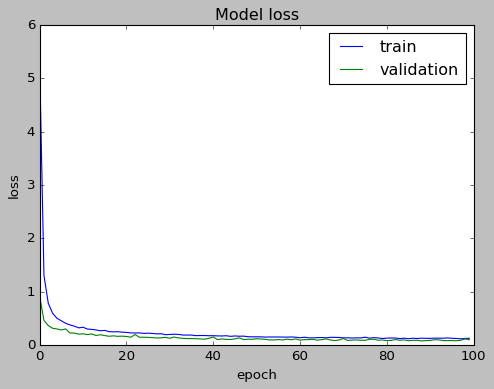

In [32]:
plt.figure(1, figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.style.use(['classic'])

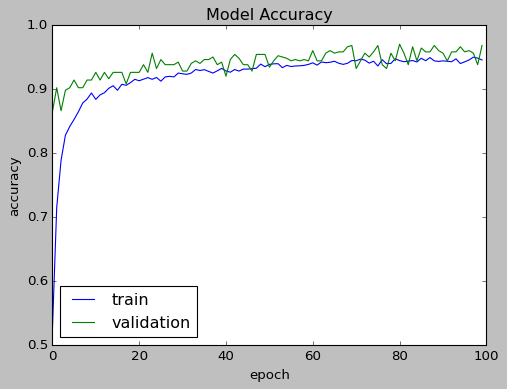

In [34]:
plt.figure(2, figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc=3)
plt.style.use(['classic'])

In [35]:
model.save('trained_model.h5')

In [38]:
!tensorflowjs_converter --input_format keras \
  ./trained_model.h5 \
  ./tfjs_files